In [150]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("online_shoppers_intention.csv")

print("Broj duplih redaka prije brisanja:", df.duplicated().sum())

df.drop_duplicates(keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)

print("Broj duplih redaka nakon brisanja:", df.duplicated().sum())
print("Novi broj redaka:", len(df))

Broj duplih redaka prije brisanja: 125
Broj duplih redaka nakon brisanja: 0
Novi broj redaka: 12205


In [151]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [153]:
print(df.isnull().sum().sort_values(ascending=False))

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [154]:
df.nunique()

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


In [155]:
categorical_features = [
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend"
]


df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [156]:
numerical_features = [
    "Administrative", "Administrative_Duration",
    "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration",
    "BounceRates", "ExitRates",
    "PageValues", "SpecialDay"
]

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df_encoded[numerical_features])

scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numerical_features)

other_features = df_encoded.drop(columns=numerical_features)

final_df = pd.concat([scaled_numeric_df, other_features], axis=1)

X = final_df.drop(columns=["Revenue"])

print("Oblik završnog skupa za klasteriranje:", X.shape)
X.head()

Oblik završnog skupa za klasteriranje: (12205, 68)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,0,0,0,0,0,0,0,0,1,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,...,0,0,0,0,0,0,0,0,1,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,0,0,0,0,0,0,0,0,1,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,...,0,0,0,0,0,0,0,0,1,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,...,0,0,0,0,0,0,0,0,1,1


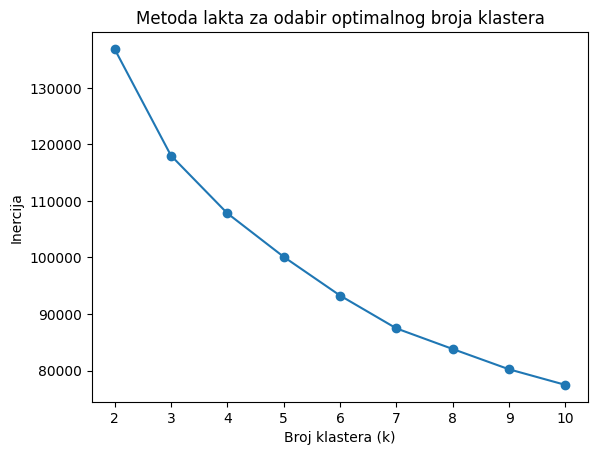

In [157]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("Broj klastera (k)")
plt.ylabel("Inercija")
plt.title("Metoda lakta za odabir optimalnog broja klastera")
plt.show()

In [158]:
from sklearn.metrics import silhouette_score

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)
X["cluster"] = labels

sil_score = silhouette_score(X, labels)

print(f"Silhouette score za k={k}: {sil_score:.4f}")

Silhouette score za k=5: 0.3319


In [159]:
cluster_summary = X.groupby("cluster").mean().round(2)
print(cluster_summary)

         Administrative  Administrative_Duration  Informational  \
cluster                                                           
0                 -0.01                    -0.03          -0.09   
1                  1.31                     1.00           0.36   
2                 -0.69                    -0.45          -0.39   
3                  1.39                     1.01           2.81   
4                 -0.39                    -0.31          -0.25   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster                                                                    
0                         -0.11           -0.04                    -0.03   
1                          0.05            0.54                     0.45   
2                         -0.25           -0.64                    -0.60   
3                          3.02            2.38                     2.36   
4                         -0.19           -0.25                    -0.23  

In [160]:
print(X["cluster"].value_counts())


cluster
4    7871
1    2270
2     917
0     587
3     560
Name: count, dtype: int64


In [162]:
import numpy as np

cluster_centers = kmeans.cluster_centers_

n_num = len(numerical_features)

centers_num_scaled = cluster_centers[:, :n_num]

centers_num_original = scaler.inverse_transform(centers_num_scaled)

binary_part = cluster_centers[:, n_num:]

binary_part_rounded = (binary_part >= 0.5).astype(int)

centers_all = np.hstack([centers_num_original, binary_part_rounded])

# Drop the 'cluster' column from X.columns before creating the DataFrame
centers_df = pd.DataFrame(centers_all, columns=X.columns.drop("cluster"))

print(centers_df)

   Administrative  Administrative_Duration  Informational  \
0        2.303237                76.355666       0.390119   
1        6.683099               258.911855       0.973151   
2        0.055616                 1.624718       0.017448   
3        6.983929               260.881834       4.087500   
4        1.022747                27.429313       0.186047   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               18.793720       30.071550              1158.637372   
1               42.301196       55.915933              2070.895921   
2                0.099455        3.288986                60.950433   
3              462.287449      138.312500              5742.343851   
4                7.489168       21.089465               771.943210   

   BounceRates  ExitRates    PageValues  SpecialDay  ...  TrafficType_14  \
0     0.002747   0.014623  7.085096e+01    0.012606  ...             0.0   
1     0.006325   0.019751  5.954054e+00    0.030106  ...    

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X["ProductRelated"],
    X["PageValues"],
    c=labels,
    s=20
)
plt.xlabel("ProductRelated")
plt.ylabel("PageValues")
plt.title("Prikaz klastera u 2D prostoru (ProductRelated vs PageValues)")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA na već skaliranom / pripremljenom skupu X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    s=20
)
plt.xlabel("PCA komponenta 1")
plt.ylabel("PCA komponenta 2")
plt.title("Vizualizacija klastera nakon PCA")
plt.show()
